In [6]:
import xgboost
import numpy as np
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [11]:
data = np.loadtxt('E:\python\data\竞赛\PimaIndiansdiabetes.csv', delimiter=',',skiprows=1)

In [14]:
data

array([[  6.   , 148.   ,  72.   , ...,   0.627,  50.   ,   1.   ],
       [  1.   ,  85.   ,  66.   , ...,   0.351,  31.   ,   0.   ],
       [  8.   , 183.   ,  64.   , ...,   0.672,  32.   ,   1.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,   0.245,  30.   ,   0.   ],
       [  1.   , 126.   ,  60.   , ...,   0.349,  47.   ,   1.   ],
       [  1.   ,  93.   ,  70.   , ...,   0.315,  23.   ,   0.   ]])

In [46]:
X = data[:,0:8]
Y = data[:,8]


In [47]:
seed = 7
test_size = 0.33

In [48]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

In [58]:
model = XGBClassifier(
    learning_rate=0.03,
    n_estimators=100,
    max_depth=5,
    min_child_weight=1,
    gamma=0,
    subsample=0.8,
    colsample_bytree=0.8,
    objective='binary:logistic',
    nthread=4,
    scale_pos_weight=1,
    seed=27
)
# model.fit(X_train,Y_train)
eval_set = [(X_test,Y_test)]
model.fit(X_train,Y_train,early_stopping_rounds=20,eval_metric="logloss",eval_set=eval_set,verbose=True)
y_predict = model.predict(X_test)
predictions = [round(value) for value in y_predict]
acc = accuracy_score(Y_test, predictions)
print(acc)

[0]	validation_0-logloss:0.68558
Will train until validation_0-logloss hasn't improved in 20 rounds.
[1]	validation_0-logloss:0.67549
[2]	validation_0-logloss:0.66700
[3]	validation_0-logloss:0.65999
[4]	validation_0-logloss:0.65329
[5]	validation_0-logloss:0.64529
[6]	validation_0-logloss:0.63966
[7]	validation_0-logloss:0.63404
[8]	validation_0-logloss:0.62849
[9]	validation_0-logloss:0.62194
[10]	validation_0-logloss:0.61724
[11]	validation_0-logloss:0.61416
[12]	validation_0-logloss:0.60869
[13]	validation_0-logloss:0.60301
[14]	validation_0-logloss:0.59911
[15]	validation_0-logloss:0.59460
[16]	validation_0-logloss:0.59011
[17]	validation_0-logloss:0.58602
[18]	validation_0-logloss:0.58138
[19]	validation_0-logloss:0.57846
[20]	validation_0-logloss:0.57422
[21]	validation_0-logloss:0.56939
[22]	validation_0-logloss:0.56462
[23]	validation_0-logloss:0.56090
[24]	validation_0-logloss:0.55805
[25]	validation_0-logloss:0.55453
[26]	validation_0-logloss:0.55052
[27]	validation_0-loglos

In [51]:
from matplotlib import pyplot as plt
from xgboost import plot_importance

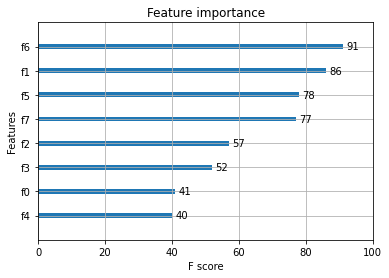

In [52]:
plot_importance(model)
plt.show()